In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud
import multiprocessing

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/admin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Read data to pandas DataFrame
df = pd.read_csv("data/tweet.csv", header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'], parse_dates=['date'])
df.head()

/var/folders/4c/y5_sfsp13z3_kk3x0c_bmt0c0000gn/T/ipykernel_27355/1114084812.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df = pd.read_csv("tweet.csv", header=None, names=['target', 'ids', 'date', 'flag', 'user', 'text'], parse_dates=['date'])


,target,ids,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [4]:
df_negative = df[df['target'] == 0].sample(10000)
df_positive = df[df['target'] == 4].sample(10000)

negative_texts = df_negative['text'].to_list()
positive_texts = df_positive['text'].to_list()

In [5]:
negative_sentiments = []

stop_words = set(stopwords.words('english'))
stop_words.update([
    "im", "youre", "shoulda", "gotta", "gonna", "dont", "cant", "didnt", "doesnt", 
    "http", "https", "com", "twitpiccom2y1zl", "rt", "lol", "d"
])

for text in df_negative['text']:
    text = text.lower()
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)

    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if len(word) > 2 and word not in stop_words]
    
    negative_sentiments.extend(filtered_tokens)

In [6]:
print(negative_sentiments)

['place', 'peop', 'fund', 'ideas', 'paper', 'still', 'michael', 'kids', 'really', 'need', 'place', 'lots', 'sep', 'familys', 'snow', 'capital', 'bars', 'found', 'thats', 'dday', 'well', 'least', 'beautiful', 'sunshine', 'stuck', 'traffic', 'fun', 'grew', 'carmel', 'spend', 'every', 'single', 'summer', 'day', 'knoebelsunfortunately', 'long', 'time', 'ago', 'incredibly', 'hurt', 'beyond', 'words', 'warm', 'amp', 'muggy', 'warmer', 'muggier', 'warm', 'amp', 'muggy', 'drat', 'rains', 'still', 'mumbai', 'oooh', 'wan', 'get', 'trends', 'nice', 'would', 'like', 'head', 'hurts', 'need', 'sleep', 'goodnight', 'world', 'break', 'bbq', 'one', 'ice', 'cold', 'peroni', 'finding', 'hard', 'get', 'back', 'work', 'morebeerplease', 'jealous', 'days', 'long', 'work', 'days', 'burned', 'popcorn', 'homesitting', 'aroundby', 'myselfamp', 'missing', 'nashville', 'friends', 'got', 'pics', 'munky', 'fieldy', 'jon', 'wouldnt', 'take', 'pics', 'work', 'really', 'miss', 'sucks', 'text', 'noone', 'come', 'pub', '

In [7]:
positive_sentiments = []

for text in df_positive['text']:
    text = text.lower()
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)

    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if len(word) > 2 and word not in stop_words]
    
    positive_sentiments.extend(filtered_tokens)

In [8]:
negative_sentiments_counts = Counter(negative_sentiments)
positive_sentiments_counts = Counter(positive_sentiments)

In [9]:
print(negative_sentiments_counts)
print(positive_sentiments_counts)

Counter({'get': 573, 'work': 572, 'like': 545, 'got': 479, 'day': 478, 'today': 475, 'going': 430, 'really': 414, 'back': 414, 'miss': 411, 'still': 362, 'want': 356, 'one': 354, 'good': 343, 'time': 338, 'sad': 335, 'know': 306, 'home': 306, 'think': 289, 'need': 284, 'feel': 284, 'last': 283, 'well': 275, 'sorry': 269, 'wish': 259, 'bad': 254, 'night': 253, 'much': 251, 'see': 238, 'tomorrow': 229, 'amp': 225, 'sleep': 221, 'new': 210, 'hate': 210, 'love': 202, 'would': 192, 'right': 192, 'hope': 189, 'sick': 186, 'ive': 182, 'could': 178, 'morning': 175, 'tonight': 174, 'make': 173, 'though': 167, 'gon': 162, 'thats': 160, 'ill': 160, 'twitter': 154, 'getting': 154, 'wont': 152, 'come': 151, 'wan': 150, 'school': 148, 'bed': 144, 'days': 142, 'even': 142, 'tired': 136, 'feeling': 135, 'way': 135, 'week': 134, 'weekend': 131, 'sucks': 127, 'better': 127, 'haha': 126, 'missed': 123, 'working': 122, 'never': 122, 'next': 118, 'fun': 117, 'great': 117, 'already': 116, 'find': 115, 'long

Text(0.5, 1.0, 'Negative Tweets Word Cloud')

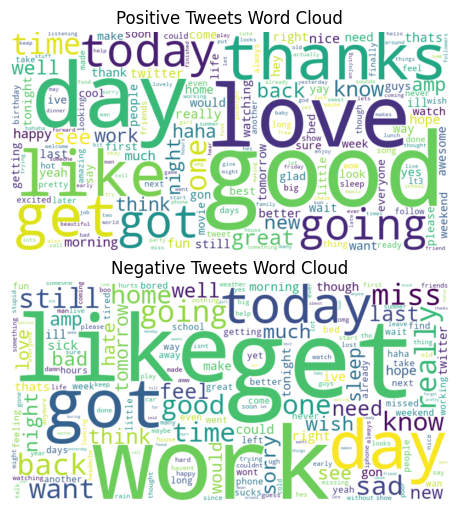

In [10]:
plt.figure(figsize=(10, 5), layout='constrained')

wc_negative = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(negative_sentiments_counts)
wc_positive = WordCloud(width=800, height=400, background_color='white', max_words=200).generate_from_frequencies(positive_sentiments_counts)

plt.subplot(2, 1, 1)
plt.imshow(wc_positive, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Tweets Word Cloud')

plt.subplot(2, 1, 2)
plt.imshow(wc_negative, interpolation="bilinear")
plt.axis('off')
plt.title('Negative Tweets Word Cloud')